In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Image gradients
Direct methods such as DSO use all pixels with high gradients.

(Text(0.5, 1.0, 'Sobel Y'), ([], []), ([], []))

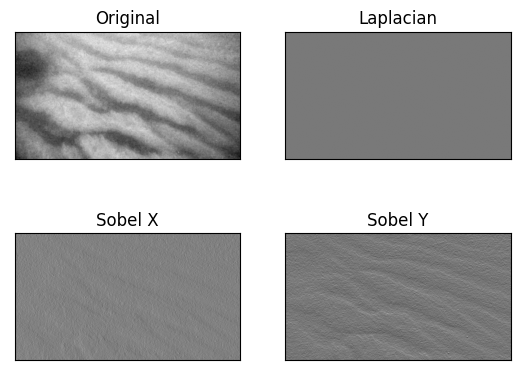

In [2]:
img = cv.imread('sample1.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

assert img is not None, "file could not be read, check with os.path.exists()"
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5) # 31 is the maximum size for sobel kernels
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

maximum gradient 312.4771991681953
(1520, 2704)
minimum gradient 0.0


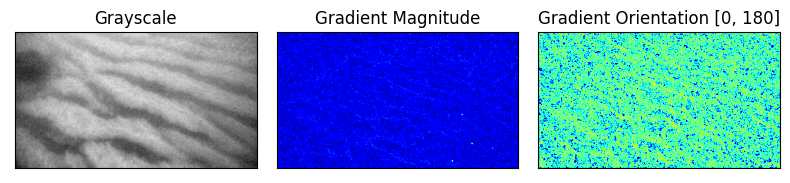

In [3]:
magnitude = np.sqrt((sobelx ** 2) + (sobely ** 2))
print('maximum gradient', np.amax(magnitude))
print(magnitude.shape)
print('minimum gradient', np.amin(magnitude))

orientation = np.arctan2(sobely, sobelx) * (180 / np.pi) % 180
# initialize a figure to display the input grayscale image along with
# the gradient magnitude and orientation representations, respectively
(fig, axs) = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
# plot each of the images
axs[0].imshow(img, cmap="gray")
axs[1].imshow(magnitude, cmap="jet")
axs[2].imshow(orientation, cmap="jet")
# set the titles of each axes
axs[0].set_title("Grayscale")
axs[1].set_title("Gradient Magnitude")
axs[2].set_title("Gradient Orientation [0, 180]")
# loop over each of the axes and turn off the x and y ticks
for i in range(0, 3):
	axs[i].get_xaxis().set_ticks([])
	axs[i].get_yaxis().set_ticks([])
# show the plots
plt.tight_layout()
plt.show()

On the left, we have the original input.

The middle displays the gradient magnitude using the Jet colormap.
Values that are closer to the blue range are very small. 
Values that are closer to the yellow/red range are quite large (relative to the rest of the values).

Finally, the image on the right displays the gradient orientation information, again using the Jet colormap.

Values here fall into the range [0, 180], where values closer to zero show as blue and values closer to 180 as red.

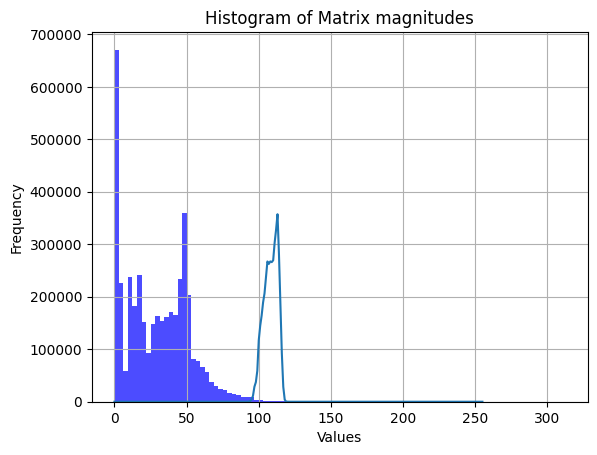

In [4]:
# compute a grayscale histogram
hist = cv.calcHist([img],[0],None,[256],[0,256]) # plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
# compute a grayscale histogram
plt.hist(magnitude.flatten(), bins=100, color='blue', alpha=0.7)
plt.title('Histogram of Matrix magnitudes')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [5]:
testsobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=7) # 31 is the maximum size for sobel kernels

print(np.amax(testsobelx))
print(np.amax(sobely))
print(np.amax(img))

4042.0
230.0
121


# ORB Descriptors

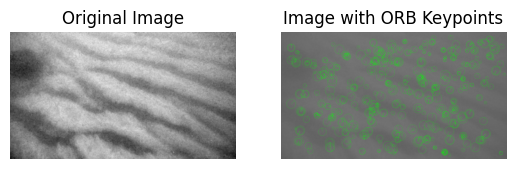

In [11]:
# Initialize ORB detector
orb = cv.ORB_create(nfeatures=10000,
                    fastThreshold=2, # 20
                    edgeThreshold=31, # 31 size of the border where the features are not detected
                    )

# Find the keypoints and descriptors with ORB
keypoints, descriptors = orb.detectAndCompute(img, None)

# Draw the keypoints on the image
img_with_keypoints = cv.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=4)

# Plot the original image and the one with keypoints
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(122), plt.imshow(img_with_keypoints)
plt.title('Image with ORB Keypoints'), plt.axis('off')

plt.show()

## Matching the ORB descriptors

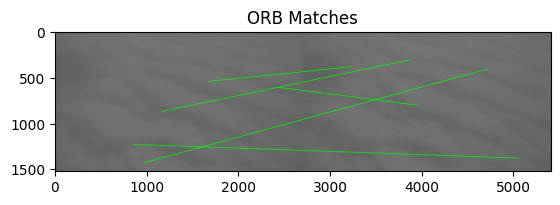

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two images
image1_path = "sample1.jpg"
image2_path = "sample2.jpg"
img1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = cv2.ORB_create(nfeatures=10000,
                    fastThreshold=2, # 20
                    edgeThreshold=10, # 31 size of the border where the features are not detected
                    )

# Find the keypoints and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# Initialize the BFMatcher
bf = cv2.BFMatcher()

# Match descriptors using KNN (k-nearest neighbors)
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches on the images
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, 
                              flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS, 
                              matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), 
                              matchesMask=None, matchesThickness=5)
# Plot the matched images
plt.imshow(img_matches)
plt.title('ORB Matches')
plt.show()


# SIFT

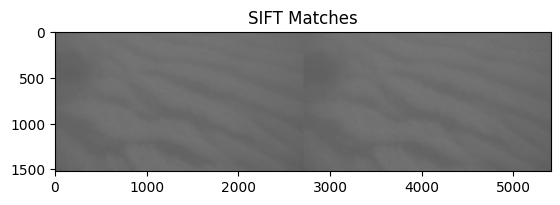

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two images
image1_path = "sample1.jpg"
image2_path = "sample2.jpg"
img1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create(nfeatures=10000, contrastThreshold=0.02, edgeThreshold=10.0)
# Find the keypoints and descriptors with SIFT
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Initialize the BFMatcher
bf = cv2.BFMatcher()

# Match descriptors using KNN (k-nearest neighbors)
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches on the images with thicker lines
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, 
                              flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS, 
                              matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), 
                              matchesMask=None, matchesThickness=5)
# Plot the matched images
plt.imshow(img_matches)
plt.title('SIFT Matches')
plt.show()
